# Business Problem 

The business problem is that UK-based e-commercial firm try to determine its strategy based on 
the customer segmentation by grouping them into different clusters. 
The purpose is to cluster the customers based on their recency, frequency, and monetary scores so that 
the company can target its customers more efficiently. 
<a href="https://archive.ics.uci.edu/ml/datasets/online+retail">Online Reatail II dataset</a> covering purchases from  01/12/2009 to 09/12/2011. 
The company mainly sells gifts and many customers of the company are wholesalers.


Only data icluding 2010 and 2011 will be used for the scope of this study.

Variables are as follows;

InvoiceNo: Unique number for each transaction\
StockCode: unique number for each item\
Description: Product name\
Quantity: Number of items sold\
InvoiceDate: Date of Invoice\
UnitPrice: Price for each item\
CostomerID: Unique costomer ID\
Country: Country where costomers reside

# Data Understanding 

In [3]:
# Importing necessary libraries we are going to use

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer

# to display all columns and rows and string formatting:

pd.set_option('display.max_columns', None); pd.set_option('display.max_rows', None);
pd.set_option('display.float_format', lambda x: '%.0f' % x)
import matplotlib.pyplot as plt

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [4]:
# Read the dataset
df_2010_2011 = pd.read_excel("../input/uci-online-retail-ii-data-set/online_retail_II.xlsx", sheet_name = "Year 2010-2011")

In [5]:
# Make the copy of dataset as df
df = df_2010_2011.copy()

In [6]:
# Display the first items of dataset
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,3,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,3,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3,17850,United Kingdom


In [7]:
# How many unique items firm sold
df["Description"].nunique()

4223

In [8]:
# Try to snapshot the total number for each unique item sold
df["Description"].value_counts().head(10) 

WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
ASSORTED COLOUR BIRD ORNAMENT         1501
SET OF 3 CAKE TINS PANTRY DESIGN      1473
PACK OF 72 RETROSPOT CAKE CASES       1385
LUNCH BAG  BLACK SKULL.               1350
NATURAL SLATE HEART CHALKBOARD        1280
Name: Description, dtype: int64

In [9]:
# Try to sort each item based on their total quantity
df.groupby("Description").agg({"Quantity":"sum"}).sort_values("Quantity", ascending = False).head(10)

,Quantity
Description,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,53847
JUMBO BAG RED RETROSPOT,47363
ASSORTED COLOUR BIRD ORNAMENT,36381
POPCORN HOLDER,36334
PACK OF 72 RETROSPOT CAKE CASES,36039
WHITE HANGING HEART T-LIGHT HOLDER,35317
RABBIT NIGHT LIGHT,30680
MINI PAINT SET VINTAGE,26437
PACK OF 12 LONDON TISSUES,26315


In [10]:
# How many unique invoice issued
df["Invoice"].nunique() 

25900

In [11]:
# Total price for each unique item sold
df["TotalPrice"] = df["Quantity"]*df["Price"] 

In [12]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,3,17850,United Kingdom,15
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3,17850,United Kingdom,20
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,3,17850,United Kingdom,22
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3,17850,United Kingdom,20
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3,17850,United Kingdom,20


In [13]:
# Total price for each invoice
df.groupby("Invoice").agg({"TotalPrice":"sum"}).head() 

,TotalPrice
Invoice,
536365,139
536366,22
536367,279
536368,70
536369,18


In [14]:
# Total orders for each country
df["Country"].value_counts().head()

United Kingdom    495478
Germany             9495
France              8558
EIRE                8196
Spain               2533
Name: Country, dtype: int64

In [15]:
# Total money earned by country
df.groupby("Country").agg({"TotalPrice":"sum"}).sort_values("TotalPrice", ascending = False).head(10) 

,TotalPrice
Country,
United Kingdom,8187806
Netherlands,284662
EIRE,263277
Germany,221698
France,197422
Australia,137077
Switzerland,56385
Spain,54775
Belgium,40911


In [16]:
# To find out cancelled sales, invoices having 'C' at the start are the returns
df[df.Invoice.str.contains("C", na = False)].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
141,C536379,D,Discount,-1,2010-12-01 09:41:00,28,14527,United Kingdom,-28
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,5,15311,United Kingdom,-5
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,2,17548,United Kingdom,-20
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0,17548,United Kingdom,-7
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0,17548,United Kingdom,-7


In [17]:
# To find out the most cancelled products
df[df.Invoice.str.contains("C", na = False)].groupby("Description").agg({"Quantity":"sum"}).sort_values("Quantity", ascending = True).head()

,Quantity
Description,
"PAPER CRAFT , LITTLE BIRDIE",-80995
MEDIUM CERAMIC TOP STORAGE JAR,-74494
ROTATING SILVER ANGELS T-LIGHT HLDR,-9376
Manual,-4066
FAIRY CAKE FLANNEL ASSORTED COLOUR,-3150


In [18]:
# To find out the items having the most money refunded
df[df.Invoice.str.contains("C", na = False)].groupby("Description").agg({"TotalPrice":"sum"}).sort_values("TotalPrice", ascending = True).head()

,TotalPrice
Description,
AMAZON FEE,-235282
"PAPER CRAFT , LITTLE BIRDIE",-168470
Manual,-146784
MEDIUM CERAMIC TOP STORAGE JAR,-77480
POSTAGE,-11871


# Data Preparation

In [19]:
# Try to learn missing values if any
df.isnull().sum()

Invoice             0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
Price               0
Customer ID    135080
Country             0
TotalPrice          0
dtype: int64

In [20]:
# since data is big enough, remove all missing variables from the data set
df.dropna(inplace = True) 

In [21]:
# indicates the number of observations after data cleaning
df.shape 

(406830, 9)

In [22]:
df.describe([0.01,0.05,0.10,0.25,0.50,0.75,0.90,0.95, 0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
Quantity,406830,12,249,-80995,-2,1,1,2,5,12,24,36,120,80995
Price,406830,3,69,0,0,0,1,1,2,4,7,8,15,38970
Customer ID,406830,15288,1714,12346,12415,12626,12876,13953,15152,16791,17719,17905,18212,18287
TotalPrice,406830,20,428,-168470,-10,1,2,4,11,20,35,67,200,168470


In [23]:
# if interested, outliers can be determined 
for feature in ["Quantity","Price","TotalPrice"]:

    Q1 = df[feature].quantile(0.05)
    Q3 = df[feature].quantile(0.95)
    IQR = Q3-Q1
    upper = Q3 + 1.5*IQR
    lower = Q1 - 1.5*IQR

    if df[(df[feature] > upper) | (df[feature] < lower)].any(axis=None):
        print(feature,"yes")
        print(df[(df[feature] > upper) | (df[feature] < lower)].shape[0])
    else:
        print(feature, "no")

Quantity yes
8608
Price yes
1353
TotalPrice yes
6284


# Creating RFM scores 
Recency : How recently a customer has made a purchase \
Frequency : How often a customer makes a purchase \
Monetary : How much money a customer spends on purchases
 

In [24]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,3,17850,United Kingdom,15
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3,17850,United Kingdom,20
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,3,17850,United Kingdom,22
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3,17850,United Kingdom,20
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3,17850,United Kingdom,20


# Recency

In [25]:
# try to determine the earliest invoice date
df["InvoiceDate"].min() 

Timestamp('2010-12-01 08:26:00')

In [26]:
# try to determine the latest invoice date
df["InvoiceDate"].max()  

Timestamp('2011-12-09 12:50:00')

In [27]:
# we set the latest date of dataset as todays`s date
import datetime as dt
today_date = dt.datetime(2011,12,9) 
today_date

datetime.datetime(2011, 12, 9, 0, 0)

In [28]:
 # try to determine the latest transaction date for each customer
df.groupby("Customer ID").agg({"InvoiceDate":"max"}).head()

,InvoiceDate
Customer ID,
12346,2011-01-18 10:17:00
12347,2011-12-07 15:52:00
12348,2011-09-25 13:13:00
12349,2011-11-21 09:51:00
12350,2011-02-02 16:01:00


In [29]:
# if we substarct the latest date of transaction for each customer from today`s date, we can get the recency 
temp_df = (today_date - df.groupby("Customer ID").agg({"InvoiceDate":"max"})) 

In [30]:
# change the column name from 'InvoiceDate'to 'Recency'
temp_df.rename(columns={"InvoiceDate": "Recency"}, inplace = True) 

In [31]:
temp_df.head()

,Recency
Customer ID,
12346,324 days 13:43:00
12347,1 days 08:08:00
12348,74 days 10:47:00
12349,17 days 14:09:00
12350,309 days 07:59:00


In [32]:
# just take the days 
recency_df = temp_df["Recency"].apply(lambda x: x.days) 
recency_df.head()

Customer ID
12346    324
12347      1
12348     74
12349     17
12350    309
Name: Recency, dtype: int64


# Frequency

In [33]:
# Try to find out the number of times each costomer has made a purchase
temp_df = df.groupby(["Customer ID","Invoice"]).agg({"Invoice":"count"})
temp_df.groupby("Customer ID").agg({"Invoice":"count"}).head() 

,Invoice
Customer ID,
12346,2
12347,7
12348,4
12349,1
12350,1


In [34]:
# Based on the Customer ID, sum of invoice are assigned as 'Frequency'
freq_df = temp_df.groupby("Customer ID").agg({"Invoice":"sum"})
freq_df.rename(columns={"Invoice": "Frequency"}, inplace = True)
freq_df.head() 

,Frequency
Customer ID,
12346,2
12347,182
12348,31
12349,73
12350,17


# Monetary

In [35]:
# Sum of total price per customer id
monetary_df = df.groupby("Customer ID").agg({"TotalPrice":"sum"}) 
monetary_df.head()

,TotalPrice
Customer ID,
12346,0
12347,4310
12348,1797
12349,1758
12350,334


In [36]:
 # cahnged the 'TotalPrice' with 'Monetary'
monetary_df.rename(columns={"TotalPrice": "Monetary"}, inplace = True) 
monetary_df.head()

,Monetary
Customer ID,
12346,0
12347,4310
12348,1797
12349,1758
12350,334


In [37]:
# Try to combine recency, frequency, and monetary as columns in rfm dataframe
rfm = pd.concat([recency_df, freq_df, monetary_df],  axis=1)
rfm.head()

,Recency,Frequency,Monetary
Customer ID,,,
12346,324,2,0
12347,1,182,4310
12348,74,31,1797
12349,17,73,1758
12350,309,17,334


In [38]:
# if interested, outliers can be determined for RFM scores
for feature in ["Recency","Frequency","Monetary"]:

    Q1 = rfm[feature].quantile(0.05)
    Q3 = rfm[feature].quantile(0.95)
    IQR = Q3-Q1
    upper = Q3 + 1.5*IQR
    lower = Q1 - 1.5*IQR

    if rfm[(rfm[feature] > upper) | (rfm[feature] < lower)].any(axis=None):
        print(feature,"yes")
        print(rfm[(rfm[feature] > upper) | (rfm[feature] < lower)].shape[0])
    else:
        print(feature, "no")

Recency no
Frequency yes
29
Monetary yes
59


In [39]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler((0,1))
cols = rfm.columns
index = rfm.index
scaled_rfm = mms.fit_transform(rfm)
scaled_rfm = pd.DataFrame(scaled_rfm, columns=cols, index = index)
scaled_rfm.head()

,Recency,Frequency,Monetary
Customer ID,,,
12346,1,0,0
12347,0,0,0
12348,0,0,0
12349,0,0,0
12350,1,0,0


## MODEL DEVELOPMENT

### K-Means Clustering

In [40]:
kmeans = KMeans(n_clusters=4)
kmeans = kmeans.fit(scaled_rfm)

In [41]:
kmeans

KMeans(n_clusters=4)

In [42]:
kmeans.cluster_centers_

array([[0.21369393, 0.00653025, 0.01856739],
       [0.82975606, 0.00278498, 0.01637859],
       [0.04803365, 0.01820862, 0.0260322 ],
       [0.51031421, 0.00424475, 0.01718031]])

In [43]:
kmeans.labels_

array([1, 2, 0, ..., 2, 2, 2], dtype=int32)

### OPTIMAL NUMBER OF CLUSTER

In [44]:
ssd = []

K = range(1,30)

for k in K:
    kmeans = KMeans(n_clusters = k).fit(rfm)
    ssd.append(kmeans.inertia_)

In [45]:
ssd

[295574993343.3854,
 100275980132.37221,
 49812082303.09404,
 30444119976.946735,
 18025797010.172592,
 11838018842.668434,
 8610359751.022818,
 5686045045.928768,
 4218214218.9621687,
 3290377097.3883142,
 2572921661.8087234,
 2114863460.5911138,
 1874860317.0636818,
 1625860546.943274,
 1406958723.4084303,
 1216897585.1458683,
 1065058806.8865321,
 931583617.3185835,
 817279563.233583,
 728322571.0949084,
 666637298.0882794,
 579462602.73986,
 522726018.76138806,
 470081549.88370293,
 414668344.53242177,
 373573337.86329377,
 345258899.5800187,
 325960840.0510278,
 309115469.38870996]

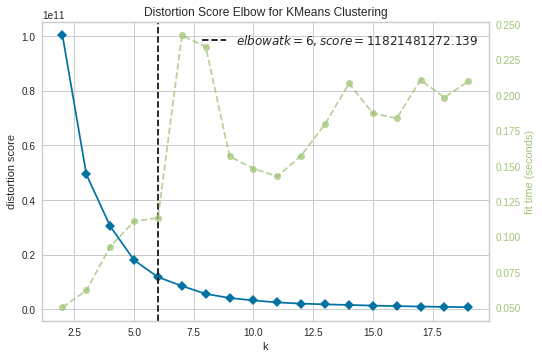

In [46]:
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (2,20))
visu.fit(rfm)
visu.poof();

### MODEL OPTIMIZATION

In [47]:
kmeans = KMeans(n_clusters = 6).fit(rfm)


In [48]:
kmeans.labels_

array([0, 4, 0, ..., 0, 0, 0], dtype=int32)

In [49]:
rfm['Cluster_Id'] = kmeans.labels_
rfm['Cluster_Id'] = rfm['Cluster_Id'] + 1

In [50]:
rfm.head()

,Recency,Frequency,Monetary,Cluster_Id
Customer ID,,,,
12346,324,2,0,1
12347,1,182,4310,5
12348,74,31,1797,1
12349,17,73,1758,1
12350,309,17,334,1


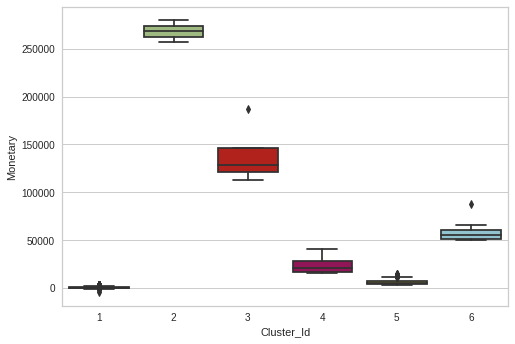

In [51]:
sns.boxplot(x='Cluster_Id', y='Monetary', data = rfm);

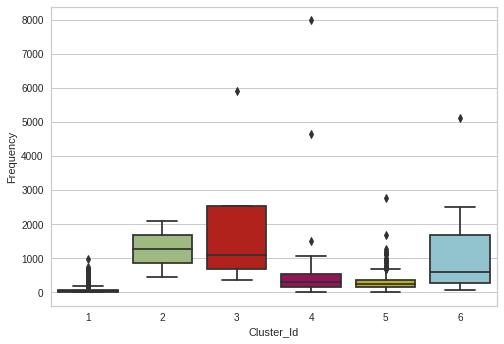

In [52]:
sns.boxplot(x='Cluster_Id', y='Frequency', data = rfm);

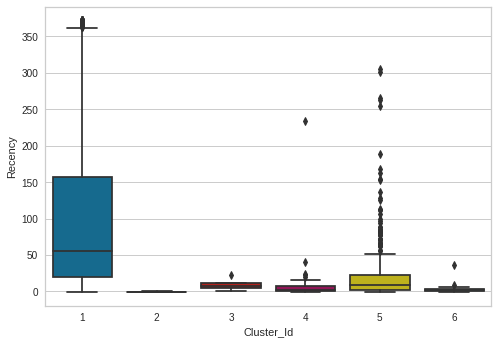

In [53]:
sns.boxplot(x='Cluster_Id', y='Recency', data = rfm);

In [54]:
rfm.groupby("Cluster_Id").agg({"Cluster_Id":"count"})

,Cluster_Id
Cluster_Id,
1,3922
2,2
3,4
4,36
5,396
6,12


In [55]:
rfm[rfm["Cluster_Id"] == 5]

,Recency,Frequency,Monetary,Cluster_Id
Customer ID,,,,
12347,1,182,4310,5
12357,32,131,6208,5
12359,6,254,6246,5
12362,2,274,5155,5
12370,50,167,3546,5
12378,128,219,4009,5
12409,77,114,11057,5
12417,2,198,3579,5
12428,24,300,7877,5


In [56]:
rfm.groupby("Cluster_Id").agg(np.mean)

,Recency,Frequency,Monetary
Cluster_Id,,,
1,98,61,835
2,-0,1259,267964
3,10,2113,139291
4,12,695,23660
5,23,296,6008
6,5,1213,58473


### HIERARCHICAL CLUSTERING

In [57]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
hc_complete = linkage(rfm, "complete")
hc_average = linkage(rfm, "average")


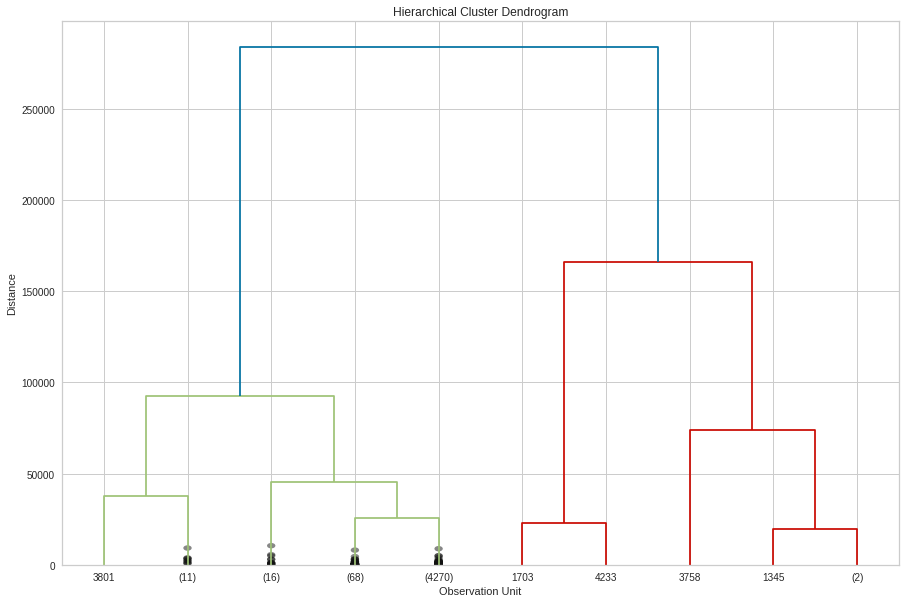

In [177]:
plt.figure(figsize = (15,10))
plt.title("Hierarchical Cluster Dendrogram")
plt.xlabel("Observation Unit")
plt.ylabel("Distance")
dendrogram(hc_complete,
           truncate_mode = "lastp",
           p = 10,
           show_contracted = True,
          leaf_font_size = 10);

In [58]:
cluster_labels = cut_tree(hc_complete, n_clusters=4).reshape(-1, )
cluster_labels

array([0, 0, 0, ..., 0, 0, 0])

In [59]:
rfm['Cluster_Labels'] = cluster_labels
rfm['Cluster_Labels'] = rfm['Cluster_Labels'] + 1
rfm.head()

,Recency,Frequency,Monetary,Cluster_Id,Cluster_Labels
Customer ID,,,,,
12346,324,2,0,1,1
12347,1,182,4310,5,1
12348,74,31,1797,1,1
12349,17,73,1758,1,1
12350,309,17,334,1,1


In [63]:
rfm.groupby("Cluster_Labels").agg(np.mean)

,Recency,Frequency,Monetary,Cluster_Id
Cluster_Labels,,,,
1,91,88,1494,1
2,10,2113,139291,3
3,5,1213,58473,6
4,-0,1259,267964,2


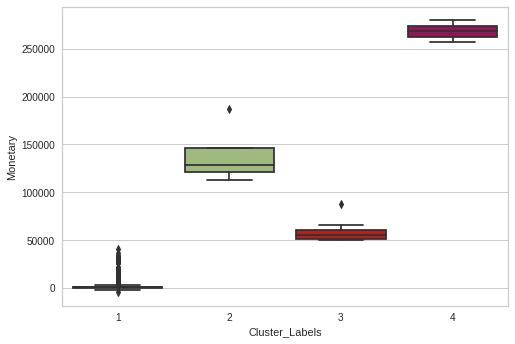

In [60]:
sns.boxplot(x='Cluster_Labels', y='Monetary', data=rfm);

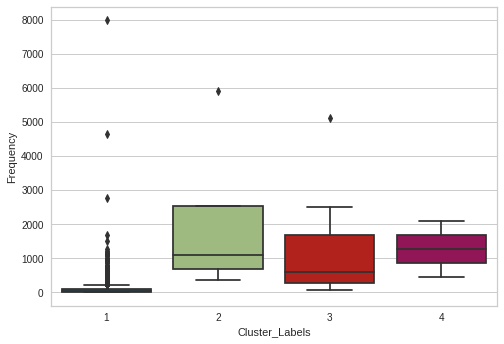

In [61]:
sns.boxplot(x='Cluster_Labels', y='Frequency', data=rfm);

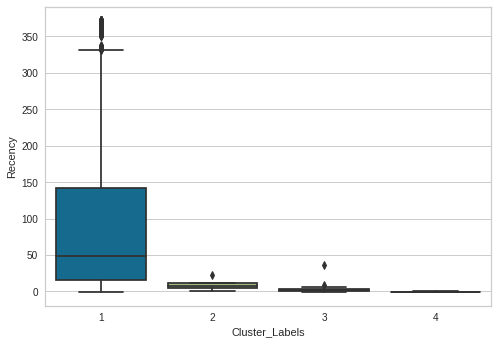

In [62]:
sns.boxplot(x='Cluster_Labels', y='Recency', data=rfm);

## CONCLUSIONS
According to K-Means Clustering with optimized 6 Cluster Ids;

Customers belong to Cluster Id 3 are the ones having the highest amount of transactions as compared to other cluster Ids.

Customers in Cluster Id 1 are the ones bring us the least amount of money and not recent buyers.

For the Hierarchical Clustering Model, customers in cluster_label 4 has the highest amount of transactions.

Customers in cluster_label 1 are the ones having the least transaction frequency.
